##**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

##**Load data and preprocessing**

In [ ]:
(X_train, _), (X_test, _) = cifar10.load_data()

In [ ]:
# Data Normalization
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [ ]:
# Reshape data
X_train = np.reshape(X_train, (len(X_train), 32, 32, 3))
X_test = np.reshape(X_test, (len(X_test), 32, 32, 3))

In [ ]:
# Print the shape to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


###**Displaying images with no noise**

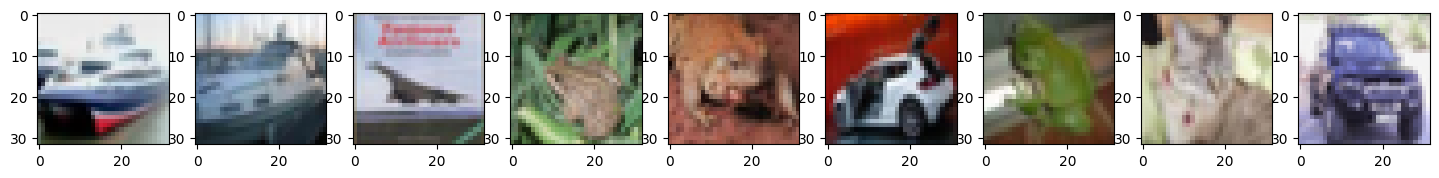

In [ ]:
plt.figure(figsize=(20, 2))
for i in range(1, 10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(X_test[i])
plt.show()

###**Generate noise**

In [ ]:
noise_factor = 0.5
X_train_noise = X_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X_test.shape)

X_train_noise = np.clip(X_train_noise, 0., 1.)
X_test_noise = np.clip(X_test_noise, 0., 1.)

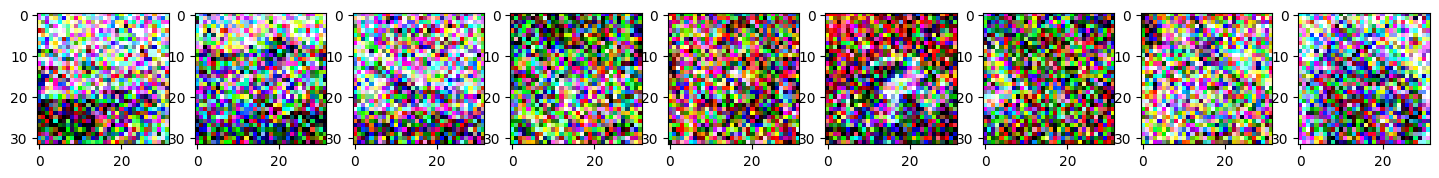

In [ ]:
# Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1, 10):
  ax = plt.subplot(1, 10, i)
  plt.imshow(X_test_noise[i])
plt.show()

##**AutoEncoder Model Structure**

In [ ]:
model = Sequential()

# Encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Decoder
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  # Change number of filters to 32
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))  # Change number of filters to 3 for RGB output

In [ ]:
# Compile
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 8)           0

###**Training**

In [ ]:
model.fit(X_train_noise, X_train, epochs = 100, batch_size = 256, shuffle = True,
          validation_data=(X_test_noise, X_test), verbose = 0)

###**Evaluation**

In [ ]:
model.evaluate(X_test_noise, X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0135


0.013483327813446522

##**Prediction**

In [ ]:
no_noise_img = model.predict(X_test_noise)

313/313 [==============================] - 1s 2ms/step


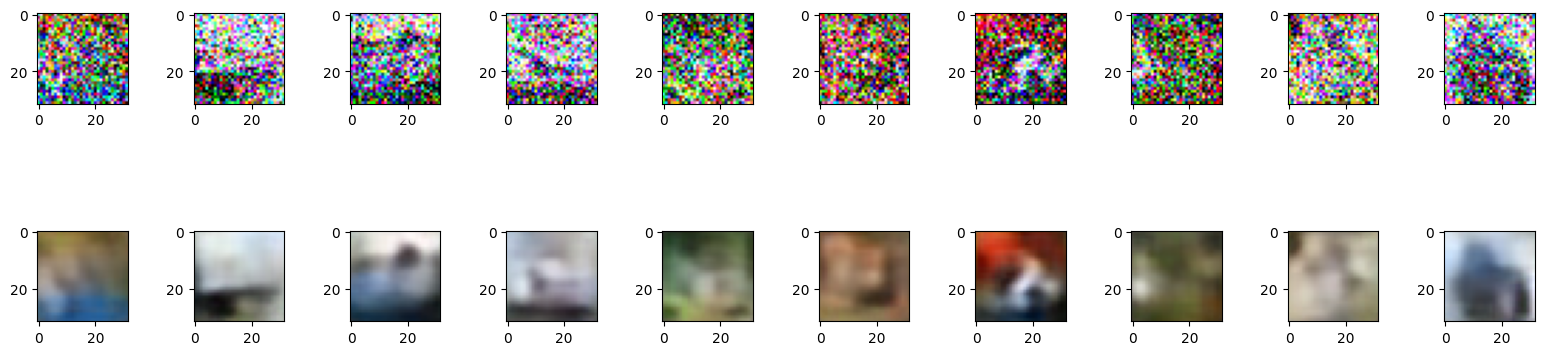

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test_noise[i])

    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i])

plt.show()